# Optimal pipe insulation problem
The possible existence of an optimum insulation thickness for radial systems is suggested by the
presence of competing effects associated with an increase in this thickness. In particular,
although the conduction resistance increases with the addition of insulation, the convection
resistance decreases due to increasing outer surface area. Hence there may exist an insulation
thickness that minimizes heat loss by maximizing the total resistance to heat transfer. Resolve
this issue by considering the following system.

A thin-walled copper tube of radius $r_i$ is used to transport a low-temperature refrigerant and is
at a temperature $T_i$ that is less than that of the ambient air at $T_\mathrm{surr}$ around the
tube. Find the optimal thickness of insulation given:

- $r_i$ = 10 mm
- $k_\mathrm{insulation}$ = 0.055 W/mK
- $h_\mathrm{surr}$ = 5 W/m<sup>2</sup>K

### Known

In [1]:
inner_radius = 0.01 / 2 # m


### Find
The optimal insulation thickness for the pipe.
### Schematic
![Schematic](../images/1DPipeInsulationExample.png)
### Assumption
1. Steady state
2. One-dimemsional heat transfer in the radial direction.
3. Thermal resistance of the pipe wall is negligible
4. All properties are uniform and constant.
5. Radiation is negligible.
### Properties

In [2]:
thermal_conductivity_insulation = 0.055 # W/mK
convection_coefficient_surrounding = 5 # W/m2K

### Analysis
From the assumption, we can simplify our heat circuit as
![Heat circuit](../images/1DPipeInsulationExample_heat_circuit.png)
The total thermal resistance per unit length is then
$$R'_\mathrm{tot} = \frac{\ln(r/r_i)}{2\pi k_\mathrm{insulation}} + \frac{1}{2 \pi r h_\mathrm{surr}}$$
We can create a python function for this expression. 

In [3]:
import numpy as np
from typing import Union

def get_thermal_resistance_cylinder(
        inner_radius: Union[float, np.ndarray],
        outer_radius: Union[float, np.ndarray],
        thermal_conductivity: Union[float, np.ndarray],
        length: Union[float, np.ndarray]
) -> float:
    """Returns 1D thermal resistance in radial direction of a cylinder"""
    return np.log(outer_radius / inner_radius) / (2 * np.pi * thermal_conductivity * length)

def get_total_thermal_resistance_for_pipe_with_insulation(
        insulation_thickness: Union[float, np.ndarray],
        pipe_radius: Union[float, np.ndarray],
        thermal_conductivity_insulation: Union[float, np.ndarray],
        convection_coefficient: Union[float, np.ndarray],
        pipe_length: Union[float, np.ndarray]
) -> Union[float, np.ndarray]:
    """Returns total thermal resistance of the pipe with insulation considering the convection"""
    outer_radius = pipe_radius + insulation_thickness
    resistance_insulation = get_thermal_resistance_cylinder(
        inner_radius=pipe_radius,
        outer_radius=outer_radius,
        thermal_conductivity=thermal_conductivity_insulation,
        length=pipe_length
    )
    outer_area = 2 * np.pi * outer_radius * pipe_length
    resistance_convection = 1 / (convection_coefficient * outer_area)
    return resistance_insulation + resistance_convection

We can visually confirm that there is a optimal thickness.

Text(0, 0.5, 'Total thermal resistance [mK/W]')

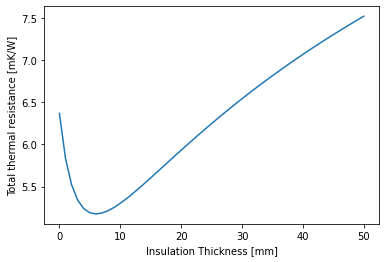

In [4]:
import matplotlib.pyplot as plt

thickness_vector = np.arange(0, 0.051, 0.001)
total_resistance_vector = get_total_thermal_resistance_for_pipe_with_insulation(
    insulation_thickness=thickness_vector,
    pipe_radius=inner_radius,
    thermal_conductivity_insulation=thermal_conductivity_insulation,
    convection_coefficient=convection_coefficient_surrounding,
    pipe_length=1 # Unit length
)

fig, ax = plt.subplots()
ax.plot(thickness_vector * 1000, total_resistance_vector)
ax.set_xlabel('Insulation Thickness [mm]')
ax.set_ylabel('Total thermal resistance [mK/W]')

We can find the minimum value with confidence now. 

In [8]:
from scipy.optimize import minimize_scalar
from functools import partial

function_to_minimize = partial(
    get_total_thermal_resistance_for_pipe_with_insulation,
    pipe_radius=inner_radius,
    thermal_conductivity_insulation=thermal_conductivity_insulation,
    convection_coefficient=convection_coefficient_surrounding,
    pipe_length=1
)

solution = minimize_scalar(function_to_minimize, method='bounded', bounds=(0, 1))
if solution.success:
    thickness_mm = solution.x * 1000
    thermal_resistance = function_to_minimize(thickness_mm / 1000)
    print(f"Optimal thickness is {thickness_mm:.2f}mm that gives total thermal resistance of {thermal_resistance:.1f} mK/W.")

Optimal thickness is 6.00mm that gives total thermal resistance of 5.2 mK/W.
